In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets

In [ ]:
iris = datasets.load_iris(as_frame=True)

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# print(iris['DESCR'])

iris.data
iris.target
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Dataset Visualization

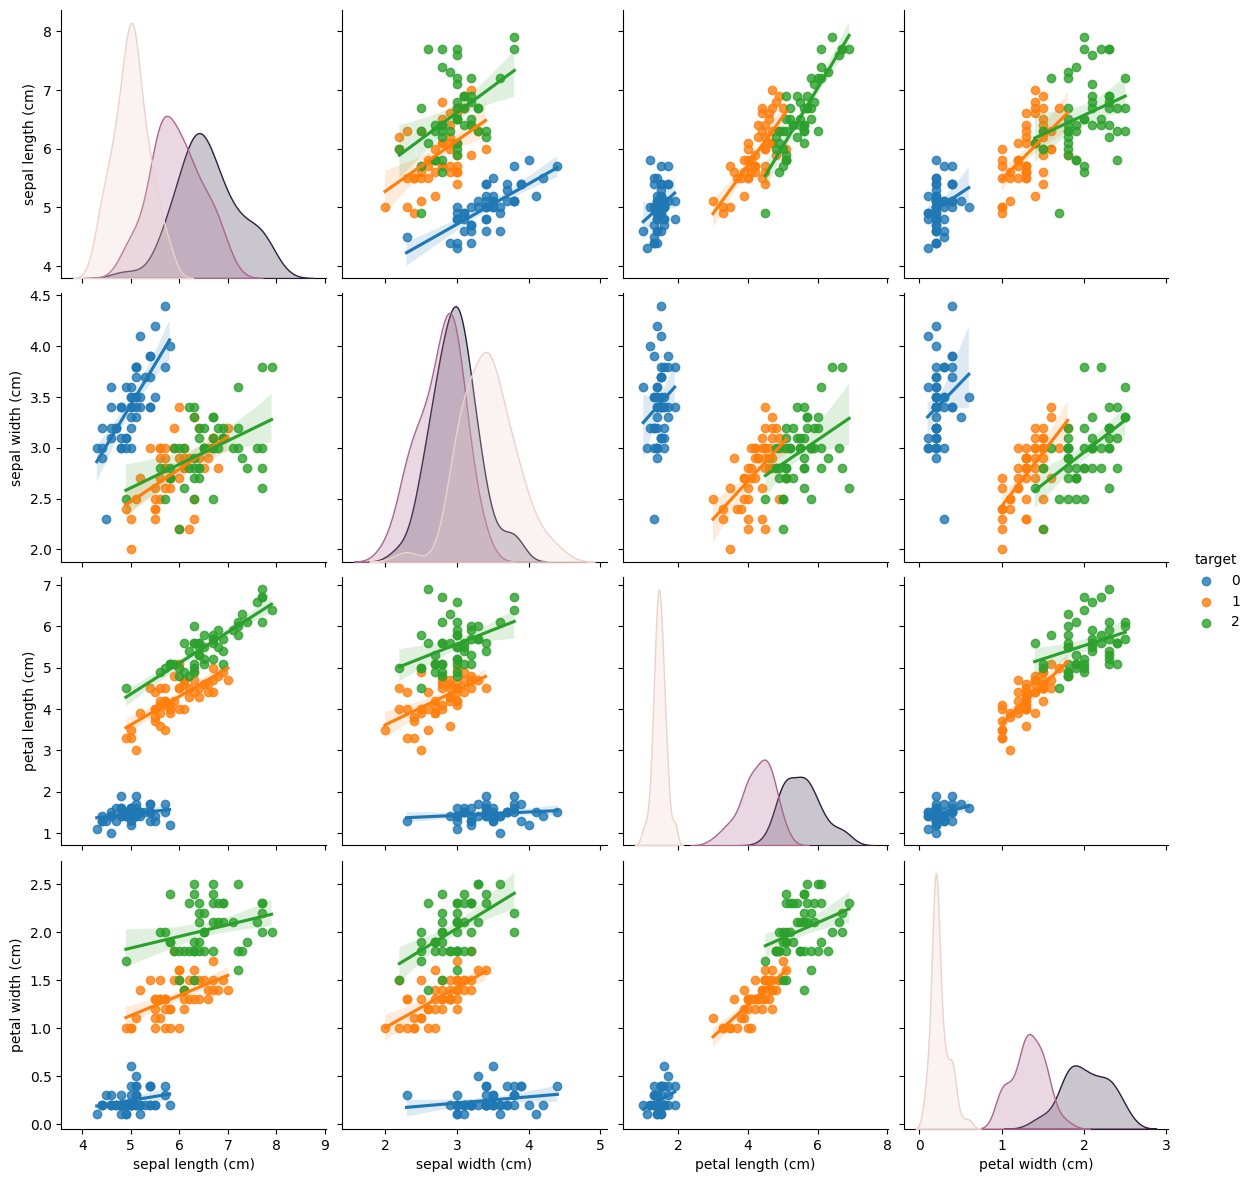

In [ ]:
df = iris.frame

# pairplot
plt.rcParams['figure.figsize'] = (8,4)
plt.rcParams['figure.dpi'] = 100

sns.pairplot(df, hue='target', height=3, aspect=1, kind='reg')

### Train Test Split

In [ ]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [ ]:
df['target'].value_counts()

,count
target,
0,50
1,50
2,50


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(df[iris.feature_names], df['target'],
                                                   test_size=0.2, random_state=0)


In [ ]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train).describe()

,0,1,2,3
count,1.200000e+02,1.200000e+02,1.200000e+02,1.200000e+02
mean,3.700743e-18,2.220446e-16,1.998401e-16,2.905084e-16
std,1.004193e+00,1.004193e+00,1.004193e+00,1.004193e+00
min,-1.866642e+00,-2.449024e+00,-1.527937e+00,-1.465668e+00
25%,-9.220052e-01,-5.890057e-01,-1.246635e+00,-1.206640e+00
50%,-9.544771e-02,-1.240012e-01,3.005240e-01,8.850133e-02
75%,7.311098e-01,5.735056e-01,7.787368e-01,8.655861e-01
max,2.384225e+00,3.131030e+00,1.735163e+00,1.642671e+00


### Model Building and Evaluation

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

y_predict = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



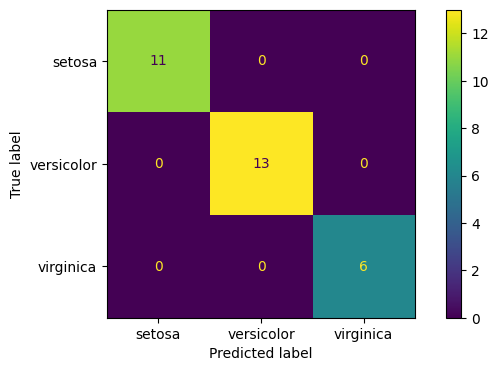

In [ ]:
cm = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(cm, display_labels=iris.target_names)
disp.plot()

### Tree Visualization


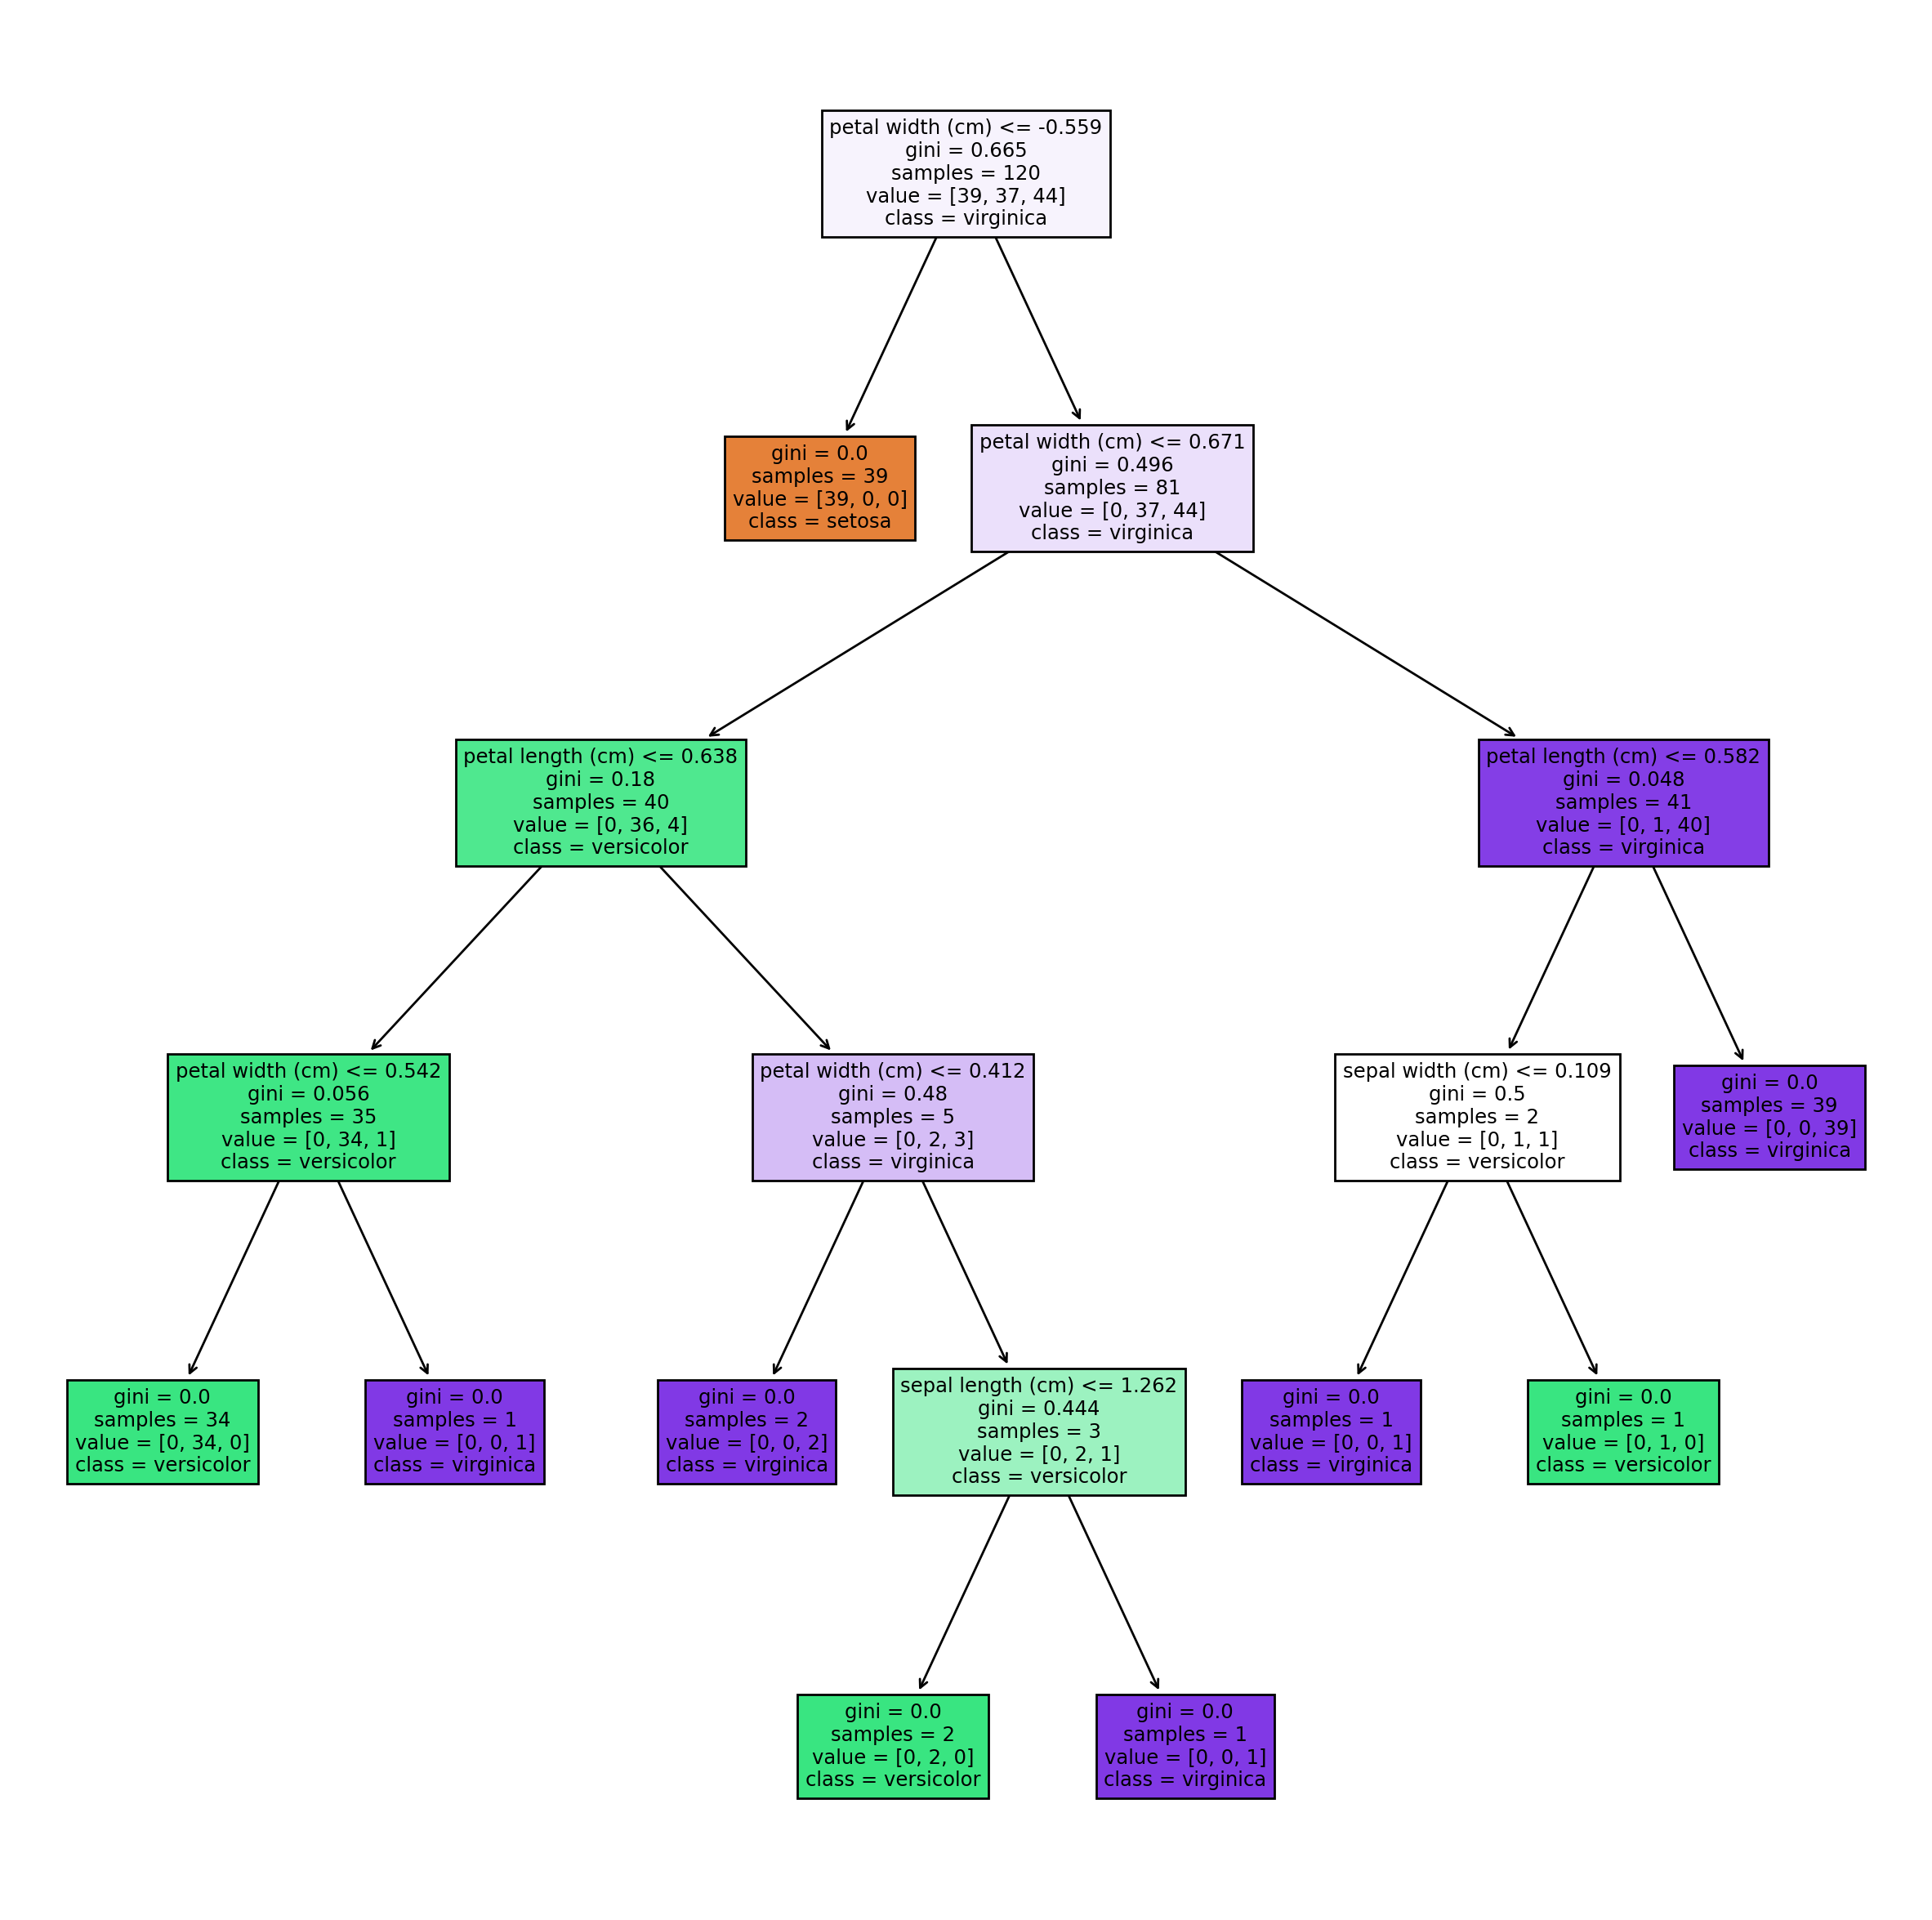

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,15), dpi=200)
ax = tree.plot_tree(model, feature_names=iris.feature_names,
                    class_names=iris.target_names, filled=True)

### Hyperparameter Optimization

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'],
         'max_depth': [1,2,3, None]}

In [ ]:
dt = DecisionTreeClassifier()
grid = GridSearchCV(dt, param_grid=params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, None],
                         'splitter': ['best', 'random']})

In [ ]:
grid.best_estimator_, grid.best_score_

(DecisionTreeClassifier(criterion='entropy', splitter='random'),
 0.9583333333333334)

In [ ]:
y_predict = grid.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Decision Tree Regression
- Decision Tree Regression is a non-parametric method, which means that it does not make any assumptions about the space distribution and the classifier structure.



In [ ]:
data_path = "/content/housing.csv"

In [ ]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv(data_path, sep='\s+', header=None, names=column_names, engine='python')

X = data.drop('MEDV', axis=1)
y = data['MEDV']

print(data.head())
print(data.columns)



      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


#### Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y,
                 test_size=0.2, random_state=0)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,-1.758769e-17,4.671731e-17,-4.396923e-17,5.716000e-17,-5.496154e-18,2.376537e-15,-1.461977e-16,-8.793846e-18,-5.935846e-17,6.815230e-17,2.709604e-16,-3.165784e-16,3.517538e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.158539e-01,-4.996076e-01,-1.526762e+00,-2.728884e-01,-1.485215e+00,-3.950234e+00,-2.355617e+00,-1.249294e+00,-9.714516e-01,-1.264869e+00,-2.674316e+00,-4.048004e+00,-1.505652e+00
25%,-4.069198e-01,-4.996076e-01,-8.581242e-01,-2.728884e-01,-9.289729e-01,-5.967544e-01,-8.318647e-01,-8.096061e-01,-6.246476e-01,-7.433194e-01,-4.846378e-01,1.958932e-01,-8.201228e-01
50%,-3.850721e-01,-4.996076e-01,-2.861312e-01,-2.728884e-01,-1.554491e-01,-1.308632e-01,3.178514e-01,-2.787728e-01,-5.090463e-01,-4.737546e-01,2.908730e-01,3.705613e-01,-1.928930e-01
75%,-3.317813e-03,3.475759e-01,9.988844e-01,-2.728884e-01,6.528398e-01,5.378870e-01,8.860302e-01,6.598793e-01,1.687378e+00,1.542121e+00,7.926742e-01,4.209263e-01,6.044331e-01
max,1.053043e+01,3.736310e+00,2.379113e+00,3.664502e+00,2.738747e+00,3.571764e+00,1.103327e+00,4.021286e+00,1.687378e+00,1.805826e+00,1.613803e+00,4.304121e-01,3.329745e+00


In [ ]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))
print("r2_score:", r2_score(y_test, y_predict))

RMSE: 5.590546993476981
r2_score: 0.616175674661821


### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param = {'max_depth': np.arange(1,10), 'min_samples_leaf':np.arange(1,10),
        'min_samples_split': np.arange(1,10), 'splitter': ['best', 'random'],
        'criterion': ['mse', "friedman_mse", "mae", "poisson"]}

dt = DecisionTreeRegressor()

grid = GridSearchCV(dt, param, cv=5)
grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
16200 fits failed out of a total of 29160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7290 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [ ]:
grid.best_params_

{'criterion': 'poisson',
 'max_depth': 8,
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'splitter': 'random'}

In [ ]:
grid.best_score_

0.8331010957550753

In [ ]:
grid.best_estimator_

DecisionTreeRegressor(criterion='poisson', max_depth=8, min_samples_leaf=2,
                      min_samples_split=9, splitter='random')

In [ ]:
y_predict = grid.predict(X_test)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))
print("r2_score:", r2_score(y_test, y_predict))

RMSE: 5.933171681803141
r2_score: 0.567687571918321


In [ ]:
fromfromfromfromfromfromfrom sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)
y_predict = reg.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_predict)))
print("r2_score:", r2_score(y_test, y_predict))

RMSE: 5.7835093150851336
r2_score: 0.5892223849182511
